# 숙제 #2

#### 에너지자원공학과 2014-11168 이진수

## 1. (10 점) 강의노트 연습문제 3.2 을 Python 으로 구현하여 풀어라
### (a) Implement the following MATLAB code in Python and test it.
#### Implementing the MATLAB program Semilogy in Python, plot the diagonal elements r_jj produced by both computations with s_jj in one figure. Which is more numerically stable, classical or modified?

Modified is more stable as we can see following graph.


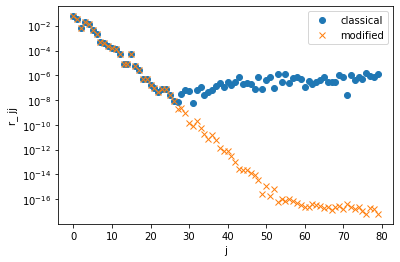

In [91]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

def clgs(A):
    A_Mat=np.array(A)
    (m,n)=A_Mat.shape
    V=A_Mat
    Q=np.eye(m,n)
    R=np.zeros((n,n))
    for j in range(n):
        for i in range(j):
            R[i,j]=np.dot(Q[:,[i]].T,A[:,[j]])
            V[:,j]=V[:,j]-R[i,j]*Q[:,i]
        R[j,j]=lin.norm(V[:,j])
        Q[:,j]=V[:,j]/R[j,j]
    return [Q,R]
    
def mgs(A):
    A_Mat=np.array(A)
    (m,n)=A_Mat.shape
    Q=A_Mat
    R=np.zeros((n,n))
    for i in range(n-1):
        R[i,i]=lin.norm(Q[:,i])
        Q[:,i]=Q[:,i]/R[i,i]
        R[i,i+1:n]=np.dot(Q[:,[i]].T,Q[:,i+1:n])
        Q[:,i+1:n]=Q[:,i+1:n]-np.dot(Q[:,[i]],R[[i],i+1:n])
    R[n-1,n-1]=lin.norm(Q[:,n-1])
    Q[:,n-1]=Q[:,n-1]/R[n-1,n-1]
    return [Q,R]

    
[U,X]=lin.qr(np.random.randn(80,80))
[V,X]=lin.qr(np.random.randn(80,80))
S=np.diag(np.exp2(-(1+np.arange(80))))
A=np.dot(np.dot(U,S),V)
[Qc,Rc]=clgs(A)
[Qm,Rm]=mgs(A)

plt.semilogy(range(80), np.diag(Rc), 'o')
plt.semilogy(range(80), np.diag(Rm), 'x')
plt.xlabel("j")
plt.ylabel("r_ jj")
plt.legend(['classical', 'modified'], loc='best')

print('Modified is more stable as we can see following graph.')

### (b)  Implement the following MATLAB code in Python .
#### Which is more numerically stable, householder or modified??

In [148]:
import numpy as np
import numpy.linalg as lin

def mgs(A):
    A_Mat=np.array(A)
    (m,n)=A_Mat.shape
    Q=A_Mat
    R=np.zeros((n,n))
    for i in range(n-1):
        R[i,i]=lin.norm(Q[:,[i]])
        Q[:,i]=Q[:,i]/R[i,i]
        R[i,i+1:n]=np.dot(Q[:,[i]].T,Q[:,i+1:n])
        Q[:,i+1:n]=Q[:,i+1:n]-np.dot(Q[:,[i]],R[[i],i+1:n])
    R[n-1,n-1]=lin.norm(Q[:,n-1])
    Q[:,n-1]=Q[:,n-1]/R[n-1,n-1]
    return [Q,R]

def qrhouse(A):
    A_Mat=np.array(A)
    (m,n)=A_Mat.shape
    R=A_Mat
    V=np.zeros((m,n))
    for k in range(min(m-1,n)):
        x=R[k:m,[k]]
        v=x+np.sign(x[0])*lin.norm(x)*np.eye(len(x),1)
        V[k:m,k]=v.T
        R[k:m,k:n]=R[k:m,k:n]-np.dot(2*v,np.dot(v.T,R[k:m,k:n]))/np.dot(v.T,v)
    R=np.triu(R[0:n,0:n])
    return [V,R]

def formQ(V):
    V_Mat=np.array(V)
    (m,n)=V_Mat.shape
    Q=np.eye(m)
    for i in range(min(m-1,n)-1,-1,-1):
        v=V_Mat[:,[i]]
        Q=Q-np.dot(2*v,np.dot(v.T,Q))/np.dot(v.T,v)
    return Q
    
A=np.array([[0.7,0.70711],[0.70001,0.70711]])
[Qm,Rm]=mgs(A)
[V,R]=qrhouse(A)
Q=formQ(V)
print("Q'*Q-eye(2) \t is \t",lin.norm(np.dot(Q.T,Q)-np.eye(2)))
print("Qm'*Qm-eye(2) \t is \t",lin.norm(np.dot(Qm.T,Qm)-np.eye(2)))
print('So, QR house is more stable.')

Q'*Q-eye(2) 	 is 	 3.236828524569469e-16
Qm'*Qm-eye(2) 	 is 	 3.2547231622285317e-11
So, QR house is more stable.


## 2. (2 점) 강의노트 연습문제 3.3 을 Python 으로 구현하여 풀어라
#### Write a Python function that computes a reduced QR decomposition  A=QR of an m x n matrix with m>=n using Givens rotation. Turn in your codes and the results when it is applied to a matrix A you chosen arbitrarily. Your result should the same as that of the MATLAB program [Q,R]=qr(A) to verify your code.

In [107]:
import numpy as np
import numpy.linalg as lin

def givens(A):
    A_Mat=np.array(A,dtype = 'float32')
    (m,n)=A_Mat.shape
    R=A_Mat
    Q=np.eye(m)
    num=0
    G=[]
    for j in range(n):
        for i in range(m-1,j,-1):
            c=-A_Mat[i-1,j]/np.sqrt(np.square(A_Mat[i-1,j])+np.square(A_Mat[i,j]))
            s=A_Mat[i,j]/np.sqrt(np.square(A_Mat[i-1,j])+np.square(A_Mat[i,j]))
            Q[i-1:i+1,j:j+2]=np.dot(np.array([[c,-s],[s,c]]),Q[i-1:i+1,j:j+2])
            G.append(Q)
            num=num+1
            Q=np.eye(m)
            R[i-1:i+1,j:n]=np.dot(np.array([[c,-s],[s,c]]),R[i-1:i+1,j:n])
    Q=np.eye(m)
    for i in range(num):
        Q=np.dot(np.array(G[num-i-1]).T,Q)
    return [Q,R]

print('When A=[6,5,0],[5,1,4],[0,4,3]],')

[q,r]=givens([[6,5,0],[5,1,4],[0,4,3]])
print('By Givens rotation, Q is \n',q)
print('R is \n',r)
print('-'*40)

Q,R= lin.qr(np.array([[6,5,0],[5,1,4],[0,4,3]]))
print("For check, when I run Python's(Numpy) QR decomposition,")
print('Q is \n',Q)
print('R is \n',R)
print('\n so, I checked that Givens rotation function runs properly.')


When A=[6,5,0],[5,1,4],[0,4,3]],
By Givens rotation, Q is 
 [[-0.76822126 -0.33265418  0.54697102]
 [-0.6401844   0.39918501 -0.65636521]
 [ 0.          0.85439605  0.51962245]]
R is 
 [[-7.8102493  -4.481291   -2.5607376 ]
 [ 0.         -4.68167    -0.96644807]
 [ 0.          0.         -4.184328  ]]
----------------------------------------
For check, when I run Python's(Numpy) QR decomposition,
Q is 
 [[-0.76822128  0.33265418 -0.54697099]
 [-0.6401844  -0.39918502  0.65636519]
 [-0.          0.854396    0.51962244]]
R is 
 [[-7.81024968 -4.4812908  -2.5607376 ]
 [ 0.          4.68166987  0.96644793]
 [ 0.          0.          4.18432806]]

 so, I checked that Givens rotation function runs properly.


## 3. (4 점) 강의노트 연습문제 4.3 을 Python 으로 구현하여 풀어라
### (a) What do the eigenvalues of a random matrix look like? What happens, say, if you take 100 random matrices and superimpose all their eigenvalues in a single plot? If you do this for m=8,16,32,64,..., what pattern is suggested? How does the spectral radius ρ(A) behave as m → ∞ ?

m = 8
ρ(A)= 0.9629399020258913
m = 16
ρ(A)= 1.124093622844231
m = 32
ρ(A)= 0.9916867272323776
m = 64
ρ(A)= 1.0177974135939176
m = 128
ρ(A)= 1.035688834482718
m = 256
ρ(A)= 1.0586476477821705
m = 512
ρ(A)= 1.035943570563918
m = 1024
ρ(A)= 1.024096399327415

 As m → ∞, ρ(A) seems like to converge at 1


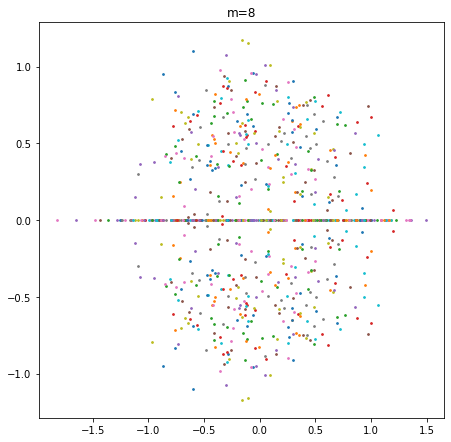

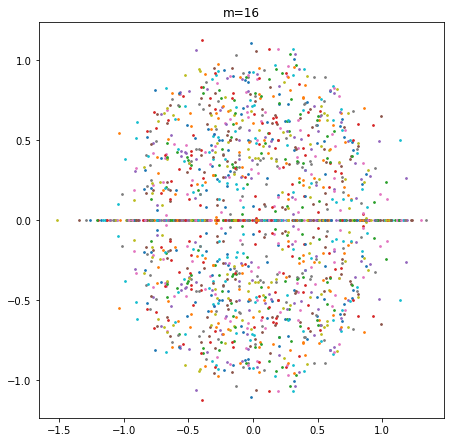

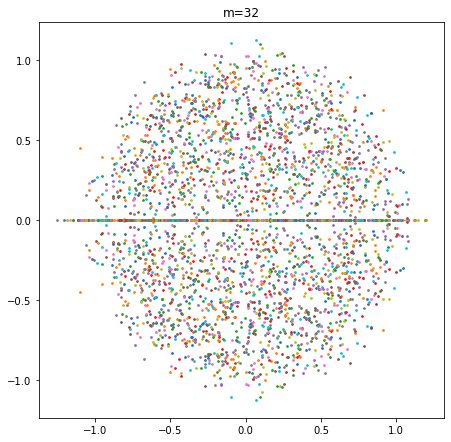

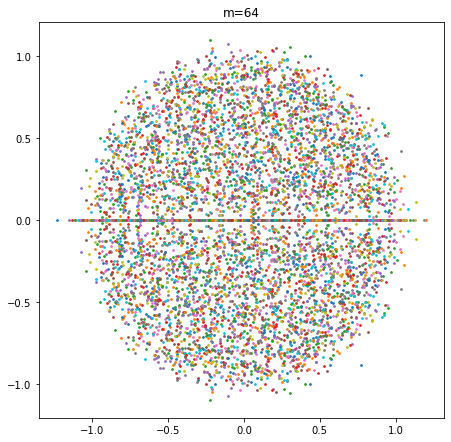

In [109]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

for i in range(4):
    m=2**(i+3)
    plt.figure(figsize=(16, 16))
    plt.subplot(221+i)
    plt.title('m=%i' % 2**(i+3))
    for j in range(100):
        a=np.random.randn(m,m)/np.sqrt(m)
        w,v= lin.eig(a)
        plt.scatter(np.real(w), np.imag(w),s=3)

for i in range(8):
    m=2**(i+3)
    print('m =',m)
    a=np.random.randn(m,m)/np.sqrt(m)
    w,v= lin.eig(a)
    rho=np.max(np.absolute(w))
    print('ρ(A)=',rho)
    
print('\n As m → ∞, ρ(A) seems like to converge at 1')

### (b)  What about norms? How does the 2-norm of a random matrix behave as m → ∞? Of course, we must have ρ(A)<=//A//. Does this inequality appear to approach an equality as m → ∞?

When m = 8 ,	 //A//-ρ(A) = 0.7503594332526633
When m = 16 ,	 //A//-ρ(A) = 0.8848531781399345
When m = 32 ,	 //A//-ρ(A) = 0.8849054429644403
When m = 64 ,	 //A//-ρ(A) = 0.8399766834577764
When m = 128 ,	 //A//-ρ(A) = 0.8940988495822684
When m = 256 ,	 //A//-ρ(A) = 0.9324264769574178
When m = 512 ,	 //A//-ρ(A) = 0.9406045522020374
When m = 1024 ,	 //A//-ρ(A) = 0.9680622566521695

 As m → ∞, //A// seems like to converge at 2 and //A//-ρ(A) seems like to converge at 1


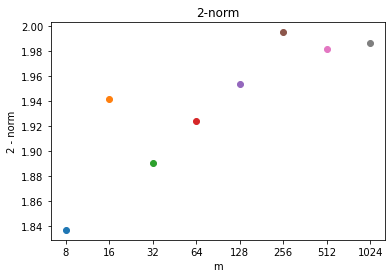

In [115]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

for i in range(8):
    m=2**(i+3)
    a=np.random.randn(m,m)/np.sqrt(m)
    u, s, vh = lin.svd(a)
    plt.scatter('%i' % 2**(i+3), s[0])
    w,v= lin.eig(a)
    rho=np.max(np.absolute(w))
    print('When m =',2**(3+i),',\t //A//-ρ(A) =',s[0]-rho)
plt.xlabel('m')
plt.ylabel("2 - norm")
plt.title('2-norm')

print('\n As m → ∞, //A// seems like to converge at 2 and //A//-ρ(A) seems like to converge at 1')

### (c)  What about condition numbers - or more simply, the smallest singular value σ_min? Even for fixed m this question is interesting. What proportions of random matrices in R^mxm seem to have σ_min<=2^(-1),4^(-1),8^(-1),...? In other words, what does the tail of the probability distribution of the smallest singular value look like? How does the scale of all this change with m?

In [97]:
import numpy as np
import numpy.linalg as lin
from scipy.stats import norm

for i in range(4):
    m=2**(i+3)
    smallest=[]
    for j in range(200):
        a=np.random.randn(m,m)/np.sqrt(m)
        u, s, vh = lin.svd(a)
        smallest.append(np.min(s))
    print('When m=',2**(i+3))
    for j in range(4):
        s_a=np.array(smallest, dtype = 'float32')
        s_a=np.where(s_a <= 2**(-j-1), 1, 0)
        print('Probability that σ_min is smaller than ','1/',2**(j+1),' is \t',sum(s_a)/2,'%')
    print('-'*20)
    
print('I can see that σ_min tends to become small as m → ∞')

When m= 8
Probability that σ_min is smaller than  1/ 2  is 	 100.0 %
Probability that σ_min is smaller than  1/ 4  is 	 98.5 %
Probability that σ_min is smaller than  1/ 8  is 	 72.0 %
Probability that σ_min is smaller than  1/ 16  is 	 44.0 %
--------------------
When m= 16
Probability that σ_min is smaller than  1/ 2  is 	 100.0 %
Probability that σ_min is smaller than  1/ 4  is 	 100.0 %
Probability that σ_min is smaller than  1/ 8  is 	 97.5 %
Probability that σ_min is smaller than  1/ 16  is 	 77.0 %
--------------------
When m= 32
Probability that σ_min is smaller than  1/ 2  is 	 100.0 %
Probability that σ_min is smaller than  1/ 4  is 	 100.0 %
Probability that σ_min is smaller than  1/ 8  is 	 100.0 %
Probability that σ_min is smaller than  1/ 16  is 	 98.5 %
--------------------
When m= 64
Probability that σ_min is smaller than  1/ 2  is 	 100.0 %
Probability that σ_min is smaller than  1/ 4  is 	 100.0 %
Probability that σ_min is smaller than  1/ 8  is 	 100.0 %
Probability 

### (d)  How do the answers to (a)-(c) above change if we consider random triangular matrices instead of full matrices, i.e., upper-triangular matrices whose entries are samples from the same distribution as above?
#### (d)-(a)

m = 8
ρ(A)= 0.8178089228382417
m = 16
ρ(A)= 0.27631774269468307
m = 32
ρ(A)= 0.49289018979001287
m = 64
ρ(A)= 0.3521954183999016
m = 128
ρ(A)= 0.24568673567801513
m = 256
ρ(A)= 0.21191180136823973
m = 512
ρ(A)= 0.14956994707674817
m = 1024
ρ(A)= 0.1250142771664399

 With a triangular matrix, ρ(A) seems like to be more smaller than a regular matrix's.
And I can check that triangular matrix's eigenvaule become real when I see graph.


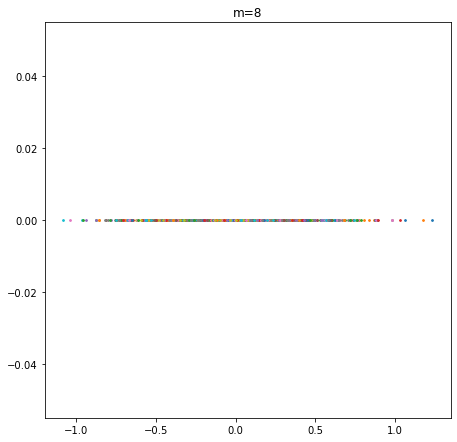

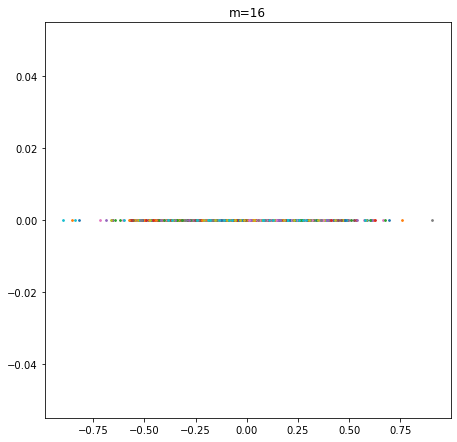

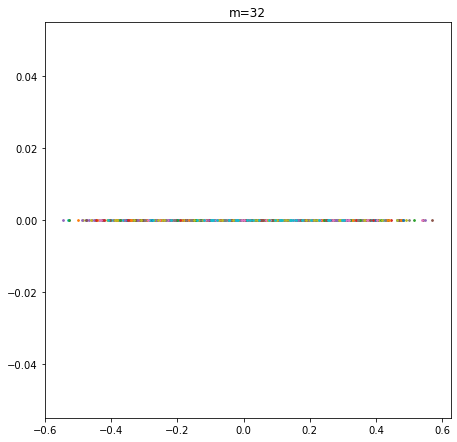

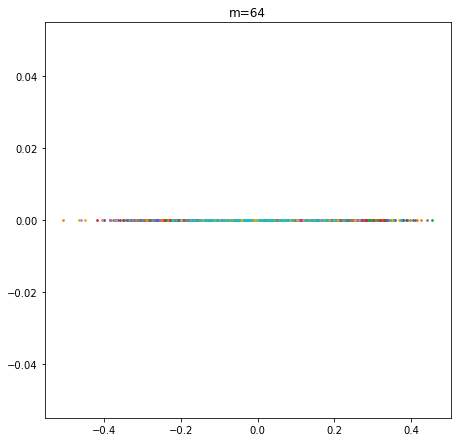

In [114]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

for i in range(4):
    m=2**(i+3)
    plt.figure(figsize=(16, 16))
    plt.subplot(221+i)
    plt.title('m=%i' % 2**(i+3))
    for j in range(100):
        a=np.triu(np.random.randn(m,m))/np.sqrt(m)
        w,v= lin.eig(a)
        plt.scatter(np.real(w), np.imag(w),s=3)

for i in range(8):
    m=2**(i+3)
    print('m =',m)
    a=np.triu(np.random.randn(m,m))/np.sqrt(m)
    w,v= lin.eig(a)
    rho=np.max(np.absolute(w))
    print('ρ(A)=',rho)
    
print("\n With a triangular matrix, ρ(A) seems like to be more smaller than a regular matrix's.")
print("And I can check that triangular matrix's eigenvaule become real when I see graph.")

#### (d)-(b)

When m = 8 ,	 //A//-ρ(A) = 0.7868781301801924
When m = 16 ,	 //A//-ρ(A) = 1.0591718728802264
When m = 32 ,	 //A//-ρ(A) = 1.0091398130075793
When m = 64 ,	 //A//-ρ(A) = 1.1952352778300641
When m = 128 ,	 //A//-ρ(A) = 1.464935964845963
When m = 256 ,	 //A//-ρ(A) = 1.4383431663941297
When m = 512 ,	 //A//-ρ(A) = 1.5128287707768178
When m = 1024 ,	 //A//-ρ(A) = 1.534107352997413

 //A// seems like be smaller. 
  And //A// and ρ(A) seem like to be more inequal with triangular matrix.


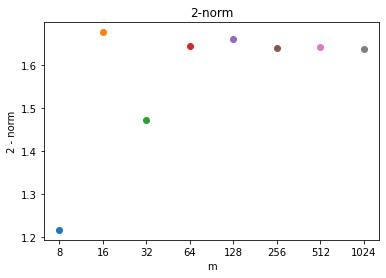

In [116]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

for i in range(8):
    m=2**(i+3)
    a=np.triu(np.random.randn(m,m))/np.sqrt(m)
    u, s, vh = lin.svd(a)
    plt.scatter('%i' % 2**(i+3), s[0])
    w,v= lin.eig(a)
    rho=np.max(np.absolute(w))
    print('When m =',2**(3+i),',\t //A//-ρ(A) =',s[0]-rho)
plt.xlabel('m')
plt.ylabel("2 - norm")
plt.title('2-norm')

print('\n //A// seems like be smaller. \n  And //A// and ρ(A) seem like to be more inequal with triangular matrix.')

#### (d)-(c)

In [117]:
import numpy as np
import numpy.linalg as lin
from scipy.stats import norm

for i in range(4):
    m=2**(i+3)
    smallest=[]
    for j in range(200):
        a=np.triu(np.random.randn(m,m))/np.sqrt(m)
        u, s, vh = lin.svd(a)
        smallest.append(np.min(s))
    print('When m=',2**(i+3))
    for j in range(4):
        s_a=np.array(smallest, dtype = 'float32')
        s_a=np.where(s_a <= 2**(-j-1), 1, 0)
        print('Probability that σ_min is smaller than ','1/',2**(j+1),' is \t',sum(s_a)/2,'%')
    print('-'*20)
    
print('n\ I can check that σ_min become small more quickly with a triangular matrix.')

When m= 8
Probability that σ_min is smaller than  1/ 2  is 	 100.0 %
Probability that σ_min is smaller than  1/ 4  is 	 100.0 %
Probability that σ_min is smaller than  1/ 8  is 	 100.0 %
Probability that σ_min is smaller than  1/ 16  is 	 98.5 %
--------------------
When m= 16
Probability that σ_min is smaller than  1/ 2  is 	 100.0 %
Probability that σ_min is smaller than  1/ 4  is 	 100.0 %
Probability that σ_min is smaller than  1/ 8  is 	 100.0 %
Probability that σ_min is smaller than  1/ 16  is 	 100.0 %
--------------------
When m= 32
Probability that σ_min is smaller than  1/ 2  is 	 100.0 %
Probability that σ_min is smaller than  1/ 4  is 	 100.0 %
Probability that σ_min is smaller than  1/ 8  is 	 100.0 %
Probability that σ_min is smaller than  1/ 16  is 	 100.0 %
--------------------
When m= 64
Probability that σ_min is smaller than  1/ 2  is 	 100.0 %
Probability that σ_min is smaller than  1/ 4  is 	 100.0 %
Probability that σ_min is smaller than  1/ 8  is 	 100.0 %
Probabi

## 4. (4 점) 강의노트 연습문제 4.6 을 Python 으로 구현하여 풀어라
### Take m=50, n=12. Using MATLAB's linspace, define t to be the m-vector corresponding to linearly spaced grid points from 0 to 1. Using MATLAB's vander and fliplr, define A to be the m x n matrix associated with least-squares fitting on this grid by a polynomial of degree n-1. Take b to be the function cos(4t) evaluated on the grid. Now, continuing to use format long, calculate and print the least-squares coefficient vector x by six methods.
### (a) Formation and solution of the normal equations, using Python's

In [6]:
import numpy as np

m=50
t=np.linspace(0,1,m)
A=np.fliplr(np.vander(t, N=12))
b=np.cos(4*t)

(x,residuals,rank,sig)=np.linalg.lstsq(A,b,rcond=None)
print(x)

[ 1.00000000e+00 -4.22743111e-07 -7.99998124e+00 -3.18763269e-04
  1.06694308e+01 -1.38202891e-02 -5.64707562e+00 -7.53160289e-02
  1.69360697e+00  6.03210535e-03 -3.74241702e-01  8.80405758e-02]


### (b) QR factorization computed by mgs(modified Gram-Schmidt) 

In [82]:
import numpy as np
import numpy.linalg as lin

def mgs(A):
    A_Mat=np.array(A)
    (m,n)=A_Mat.shape
    Q=A_Mat
    R=np.zeros((n,n))
    for i in range(n-1):
        R[i,i]=lin.norm(Q[:,i])
        Q[:,i]=Q[:,i]/R[i,i]
        R[i,i+1:n]=np.dot(Q[:,[i]].T,Q[:,i+1:n])
        Q[:,i+1:n]=Q[:,i+1:n]-np.dot(Q[:,[i]],R[[i],i+1:n])
    R[n-1,n-1]=lin.norm(Q[:,n-1])
    Q[:,n-1]=Q[:,n-1]/R[n-1,n-1]
    return [Q,R]

m=50
t=np.linspace(0,1,m)
A=np.fliplr(np.vander(t, N=12))
b=np.cos(4*t)

[Q,R]=mgs(A)
(x, residuals,rank,sig)=np.linalg.lstsq(R,np.dot(Q.T,b),rcond=None)
print(x)

[ 1.00000000e+00 -3.06805759e-07 -7.99998542e+00 -2.59043151e-04
  1.06689862e+01 -1.18629667e-02 -5.65250336e+00 -6.55730536e-02
  1.68230256e+00  1.42165330e-02 -3.77603616e-01  8.86388520e-02]


### (c) QR factorization computed by qrhouse(Householder triangularization)

In [146]:
import numpy as np
import numpy.linalg as lin

def qrhouse(A):
    A_Mat=np.array(A)
    (m,n)=A_Mat.shape
    R=A_Mat
    V=np.zeros((m,n))
    for k in range(min(m-1,n)):
        x=R[k:m,[k]]
        v=x+np.sign(x[0])*lin.norm(x)*np.eye(len(x),1)
        V[k:m,k]=v.T
        R[k:m,k:n]=R[k:m,k:n]-np.dot(2*v,np.dot(v.T,R[k:m,k:n]))/np.dot(v.T,v)
    R=np.triu(R[0:n,0:n])
    return [V,R]

def formQ(V):
    V_Mat=np.array(V)
    (m,n)=V_Mat.shape
    Q=np.eye(m,n)
    for i in range(min(m-1,n)-1,-1,-1):
        v=V_Mat[:,[i]]
        Q=Q-np.dot(2*v,np.dot(v.T,Q))/np.dot(v.T,v)
    return Q

m=50
t=np.linspace(0,1,m)
A=np.fliplr(np.vander(t, N=12))
b=np.cos(4*t)

[V,R]=qrhouse(A)
Q=formQ(V)
(x,residuals,rank,sig)=np.linalg.lstsq(R,np.dot(Q.T,b),rcond=None)
print(x)

[ 1.00000000e+00 -4.22743106e-07 -7.99998124e+00 -3.18763258e-04
  1.06694308e+01 -1.38202887e-02 -5.64707563e+00 -7.53160274e-02
  1.69360697e+00  6.03210639e-03 -3.74241702e-01  8.80405759e-02]


### (d) QR  factorization computed by Python's qr(also Householder triangularization)

In [14]:
import numpy as np

m=50
t=np.linspace(0,1,m)
A=np.fliplr(np.vander(t, N=12))
b=np.cos(4*t)

Q,R= lin.qr(A)
(x, residuals,rank,sig)=np.linalg.lstsq(R,np.dot(Q.T,b),rcond=None)
print(x)

[ 1.00000000e+00 -4.22743150e-07 -7.99998124e+00 -3.18763288e-04
  1.06694308e+01 -1.38202896e-02 -5.64707562e+00 -7.53160312e-02
  1.69360697e+00  6.03210352e-03 -3.74241701e-01  8.80405757e-02]


### (e) x=A\b (also based on QR factorization)

In [48]:
### This is Jupter Notebook, so we cannot use \ calculation.

### (f) SVD, using Python's . 

In [49]:
import numpy as np

m=50
t=np.linspace(0,1,m)
A=np.fliplr(np.vander(t, N=12))
b=np.cos(4*t)

Q,R= lin.qr(A)
(x, residuals,rank,sig)=np.linalg.lstsq(R,np.dot(Q.T,b),rcond=None)
print(x)

[ 1.00000000e+00 -4.22743150e-07 -7.99998124e+00 -3.18763288e-04
  1.06694308e+01 -1.38202896e-02 -5.64707562e+00 -7.53160312e-02
  1.69360697e+00  6.03210352e-03 -3.74241701e-01  8.80405757e-02]


### (g) The above calculation will produce six lists of 12 coefficients. In each list, shade with red pen the digits that appear to be wrong (affected by rounding error). Comment on what differences you observe. Do the normal equations exhibit instability? You do not have to explain your observations, just present them.

In [168]:
print("(a) Formation and solution of the normal equations, using Python's \n\n [ 1.00000000e+00 -4.22743111e-07 -7.99998124e+00 -3.18763269e-04 1.06694308e+01 -1.38202891e-02 -5.64707562e+00 -7.53160289e-02 1.69360697e+00  6.03210535e-03 -3.74241702e-01  8.80405758e-02]")
print('-'*130)
print('(b) QR factorization computed by mgs(modified Gram-Schmidt) \n\n','\033[31m', '[ 1.00000000e+00 -3.06805759e-07 -7.99998542e+00 -2.59043151e-04 1.06689862e+01 -1.18629667e-02 -5.65250336e+00 -6.55730536e-02 1.68230256e+00  1.42165330e-02 -3.77603616e-01  8.86388520e-02]')
print('\033[30m','-'*130)
print("(c) QR factorization computed by Python's qr(also Householder triangularization) \n\n [ 1.00000000e+00 -4.22743106e-07 -7.99998124e+00 -3.18763258e-04 1.06694308e+01 -1.38202887e-02 -5.64707563e+00 -7.53160274e-02 1.69360697e+00  6.03210639e-03 -3.74241702e-01  8.80405759e-02]")
print('-'*130)
print('(d) x=A\\b (also based on QR factorization) \n\n [ 1.00000000e+00 -4.22743150e-07 -7.99998124e+00 -3.18763288e-04 1.06694308e+01 -1.38202896e-02 -5.64707562e+00 -7.53160312e-02 1.69360697e+00  6.03210352e-03 -3.74241701e-01  8.80405757e-02]')
print('-'*130)
print("(f) SVD, using Python's \n\n [ 1.00000000e+00 -4.22743150e-07 -7.99998124e+00 -3.18763288e-04 1.06694308e+01 -1.38202896e-02 -5.64707562e+00 -7.53160312e-02 1.69360697e+00  6.03210352e-03 -3.74241701e-01  8.80405757e-02]")
print('-'*130)

(a) Formation and solution of the normal equations, using Python's 

 [ 1.00000000e+00 -4.22743111e-07 -7.99998124e+00 -3.18763269e-04 1.06694308e+01 -1.38202891e-02 -5.64707562e+00 -7.53160289e-02 1.69360697e+00  6.03210535e-03 -3.74241702e-01  8.80405758e-02]
----------------------------------------------------------------------------------------------------------------------------------
(b) QR factorization computed by mgs(modified Gram-Schmidt) 

  [ 1.00000000e+00 -3.06805759e-07 -7.99998542e+00 -2.59043151e-04 1.06689862e+01 -1.18629667e-02 -5.65250336e+00 -6.55730536e-02 1.68230256e+00  1.42165330e-02 -3.77603616e-01  8.86388520e-02]
 ----------------------------------------------------------------------------------------------------------------------------------
(c) QR factorization computed by Python's qr(also Householder triangularization) 

 [ 1.00000000e+00 -4.22743106e-07 -7.99998124e+00 -3.18763258e-04 1.06694308e+01 -1.38202887e-02 -5.64707563e+00 -7.53160274e-02 1.69360